<a href="https://colab.research.google.com/github/ParkEunbin/gnbai20201/blob/master/lab3/gnbai_4%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.import


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2. Load data


In [0]:
columns=['x1','x2','y']
data=pd.read_csv("/content/data_lab3.txt", names=columns, sep=' ')


In [0]:
#data

3.

In [0]:
#넘파이 행렬로 바꺼줌
data_np=np.asarray(data)

#shuffle data
np.random.shuffle(data_np)
#define x
x=data_np[:, :2]
#define y
labels=data_np[:, 2].astype(np.int)
y=np.identity(2)[labels]

In [0]:
#define I,N,J,K

I,N = x.shape #unpacking #입력층 노드2개
J = y.shape[1] #출력층 2개
K = 5 #자유롭게 지정가능  #히든층 5개

In [0]:
#x-bar
x_bar = np.hstack((np.ones((I,1)),x)) 

#파라미터 초기화
v=np.random.rand(N+1,K)
w=np.random.rand(K+1,J)


4.Train

In [0]:
alpha1=0.01
alpha2=0.01

max_epoch=3000

In [0]:
def sigmoid(z):
  return 1./(np.ones_like(z)+np.exp(-z))

In [0]:
def SSE(g,y):
  result=0;
  for i in range(g.shape[0]):
    for j in range(g.shape[1]):
      result+= (g[i,j]-y[i,j])**2

  return result/2 



In [88]:
for epoch in range(max_epoch): 
#순전파
  x_bar_bar = np.dot(x_bar, v)
  F= sigmoid(x_bar_bar)
  F_bar= np.hstack((np.ones((I,1)), F))
  F_bar_bar= np.dot(F_bar, w)
  G = sigmoid(F_bar_bar)

#역전파

#출력층 단계
  for k in range(0,K+1):
    for j in range(0,J):
      for i in range(0,I):
        w[k,j]-= alpha1*(G[i,j]-y[i,j])*G[i,j]*(1-G[i,j])*F_bar[i,k]

#은닉 층 단계
  for n in range(0,N+1):
    for k in range(0,K):
      for i in range(0,I):
        for j in range(0,J):
          v[n,k]-= alpha2*(G[i,j]-y[i,j])*G[i,j]*(1-G[i,j])*w[k,j]*F[i,k]*(1-F[i,k])*x_bar[i,n]

  error =SSE(G,y)

  if epoch%100 ==0:
    print("epoch:%d, error:%.2f" %(epoch,error))

epoch:0, error:20.70
epoch:100, error:12.42
epoch:200, error:12.35
epoch:300, error:12.27
epoch:400, error:12.18
epoch:500, error:12.07
epoch:600, error:11.94
epoch:700, error:11.75
epoch:800, error:11.50
epoch:900, error:11.14
epoch:1000, error:10.63
epoch:1100, error:9.91
epoch:1200, error:8.97
epoch:1300, error:7.89
epoch:1400, error:6.79
epoch:1500, error:5.82
epoch:1600, error:5.03
epoch:1700, error:4.39
epoch:1800, error:3.90
epoch:1900, error:3.51
epoch:2000, error:3.19
epoch:2100, error:2.94
epoch:2200, error:2.74
epoch:2300, error:2.57
epoch:2400, error:2.43
epoch:2500, error:2.32
epoch:2600, error:2.23
epoch:2700, error:2.15
epoch:2800, error:2.08
epoch:2900, error:2.02


In [0]:
def h(x,v,w):
  _x_bar = np.hstack((np.ones((I,1)),x)) 
  _x_bar_bar = np.dot(_x_bar, v)
  _F= sigmoid(_x_bar_bar)
  
  _F_bar= np.hstack((np.ones((I,1)), _F))
  _F_bar_bar= np.dot(_F_bar, w)
  _G = sigmoid(_F_bar_bar)

  return _G

In [0]:
g=h(x,v,w)
#둘중 큰게 정답

In [0]:
labels=np.argmax(g, axis=1)

6.plot

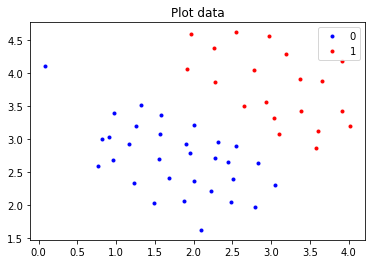

In [92]:
#0 파란점, 1:빨간점

x_0=x[labels==0] #x가 0인 것만
x_1=x[labels==1]

plt.plot(x_0[:,0],x_0[:,1],'b.',label='0')
plt.plot(x_1[:,0],x_1[:,1],'r.',label='1')
plt.title('Plot data')
plt.legend()
plt.show()

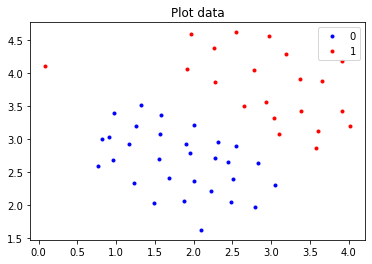

In [94]:
labels_orignal=np.argmax(y,axis=1)
x_0_orignal = x[labels_orignal==0]
x_1_orignal = x[labels_orignal==1]

plt.plot(x_0_orignal[:,0],x_0_orignal[:,1],'b.',label='0')
plt.plot(x_1_orignal[:,0],x_1_orignal[:,1],'r.',label='1')
plt.title('Plot data')
plt.legend()
plt.show()